In [1]:
%matplotlib inline

from glob import glob
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from counterfactualms.experiments.plotting.plotting_helper import (
    plot_gen_intervention_range, interactive_plot, setup, get_best_model
)

In [2]:
model_paths = glob('/iacl/pg20/jacobr/calabresi/run/SVIExperiment/ConditionalVISEM/version_15/checkpoints/*.ckpt')
model_path = get_best_model(model_paths)
csv_path = "/iacl/pg20/jacobr/calabresi/png/csv/train_png.csv"
setup(model_path, csv_path, use_gpu=True)

In [3]:
model_name = 'ConditionalVISEM'

# Plotting

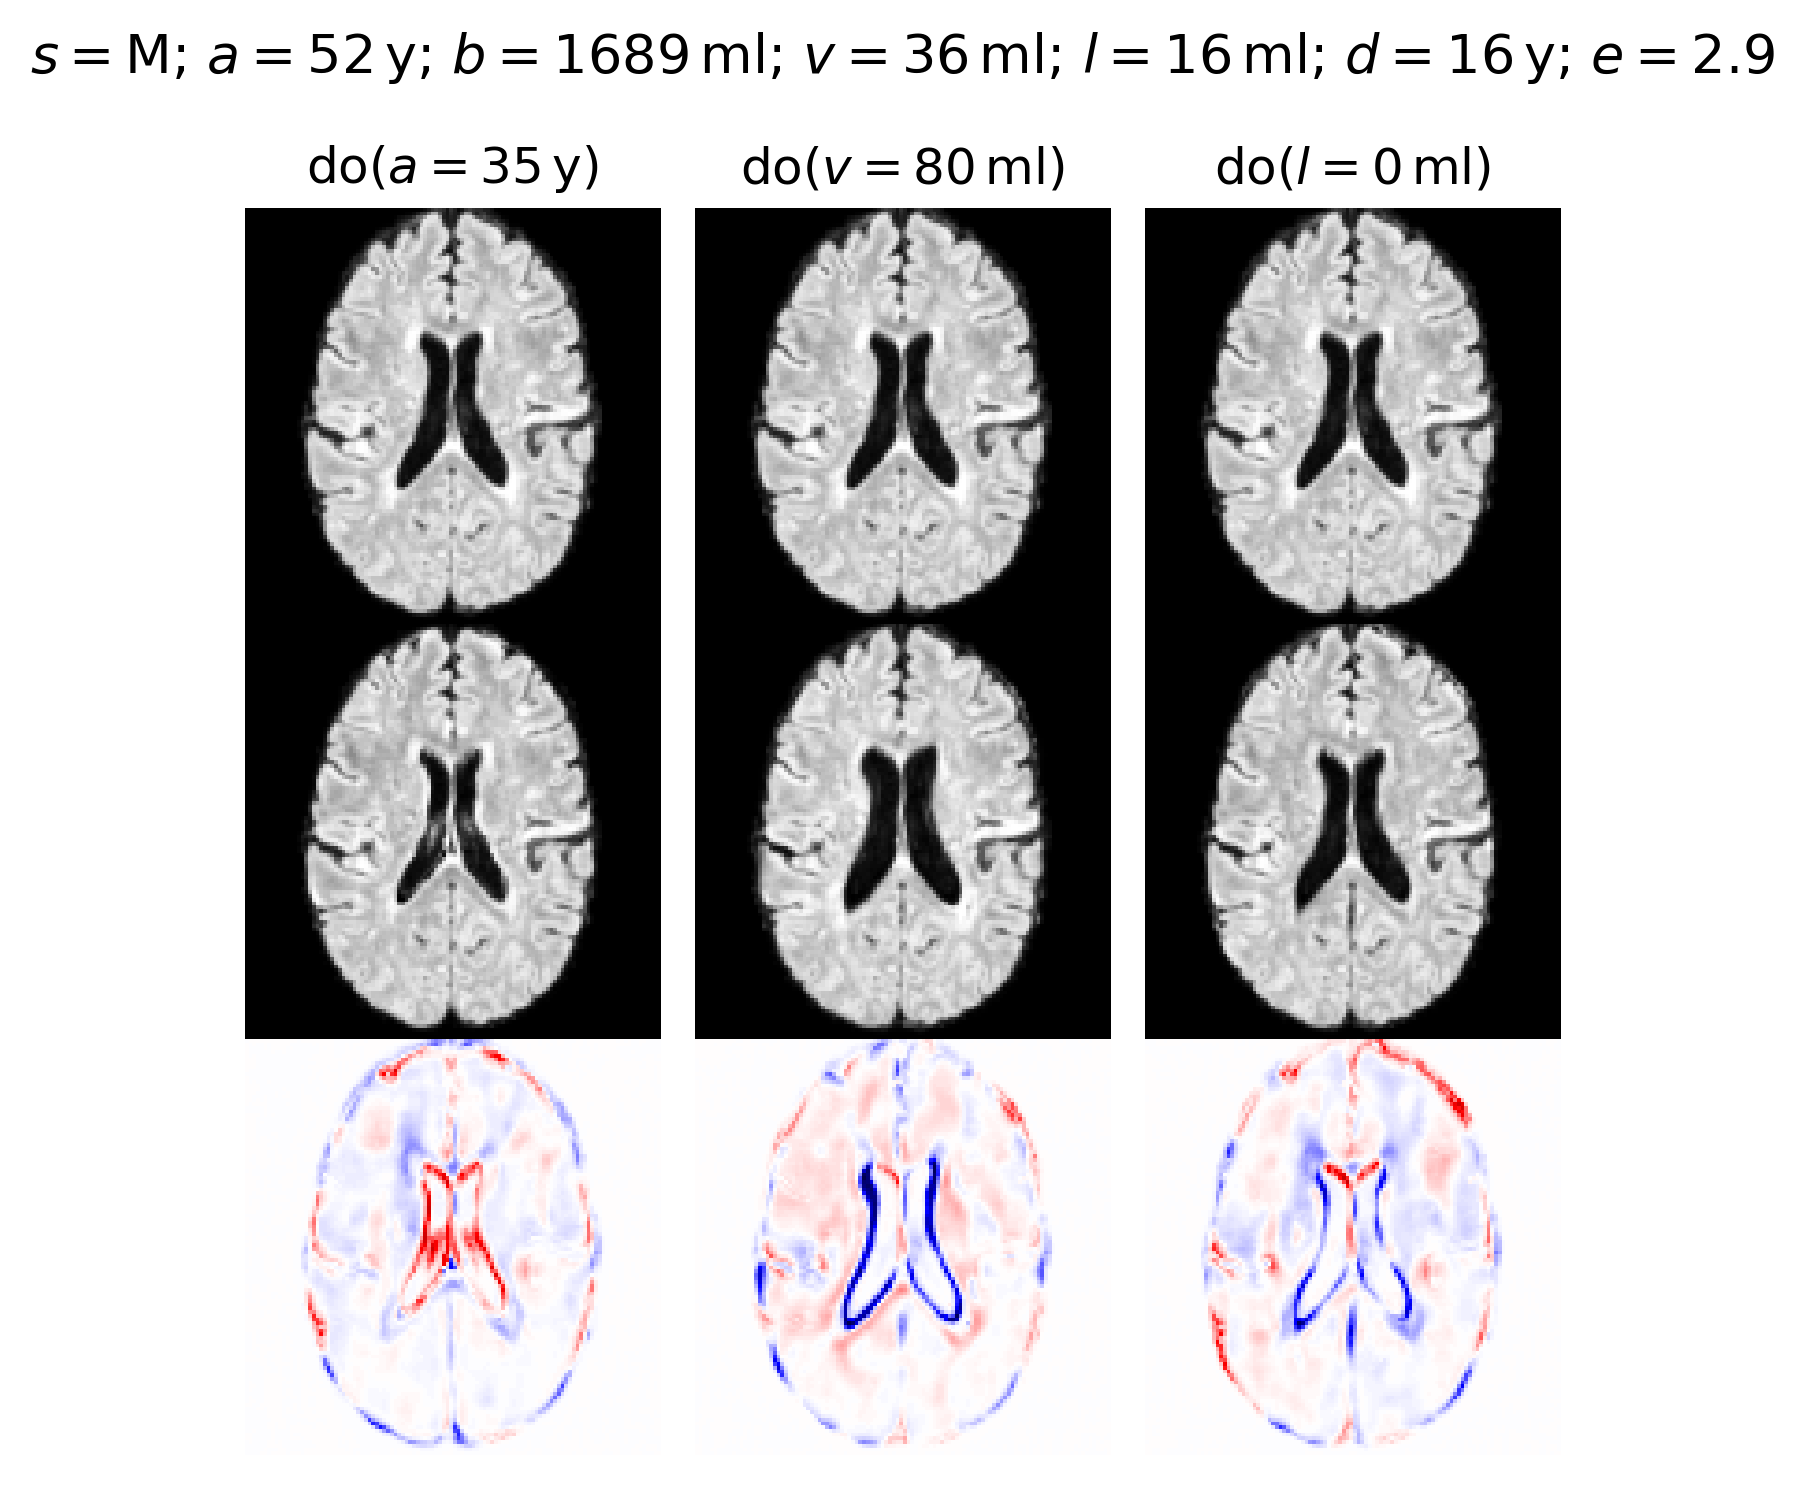

In [4]:
idx = 291

interventions = [
    {'age': 35.},
    {'ventricle_volume': 80000.},
    {'lesion_volume': 1e-5}
]

plot_gen_intervention_range(model_name, interventions, idx, normalise_all=True, num_samples=64)

# Interactive Plotting

Difference is the test image minus the original. Red shows higher intensity in the test image relative to the original, and blue shows lower intensity in the test image relative to the original.

In [5]:
interactive_plot(model_name);